<a href="https://colab.research.google.com/github/KISHOREKANCHI/TASK4-SPAM-EMAIL-DETECTION/blob/main/SPAM_EMAIL_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import nltk
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import seaborn as sea
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
# Load dataset
drive.mount('/content/gdrive')
data_set = pd.read_csv('/content/gdrive/MyDrive/spam.csv',encoding='latin-1')


Mounted at /content/gdrive


In [ ]:
# Print first 5 rows
print("Top 5 rows of dataset")
print(data_set.head())


Top 5 rows of dataset
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
# Print random 10 rows
print("Random 10 rows")
print(data_set.sample(10))


Random 10 rows
        v1                                                 v2 Unnamed: 2  \
4593   ham  I had a good time too. Its nice to do somethin...        NaN   
2017   ham  Better than bb. If he wont use it, his wife wi...        NaN   
3988   ham  Ok lor. Anyway i thk we cant get tickets now c...        NaN   
4147  spam  Please call Amanda with regard to renewing or ...        NaN   
4906   ham                             Then anything special?        NaN   
1703   ham                          Just taste fish curry :-P        NaN   
3486   ham                      Change windows logoff sound..        NaN   
3659   ham        I will reach ur home in  &lt;#&gt;  minutes        NaN   
5486   ham                  Ofcourse I also upload some songs        NaN   
5156   ham  Sir, I need Velusamy sir's date of birth and c...        NaN   

     Unnamed: 3 Unnamed: 4  
4593        NaN        NaN  
2017        NaN        NaN  
3988        NaN        NaN  
4147        NaN        NaN  
490

In [ ]:
# Print total number of rows and columns in dataset
print("Total rows and columns in dataset")
print(data_set.shape)


Total rows and columns in dataset
(5572, 5)


In [ ]:
# Print number of rows and columns in dataset separately
print("Total Rows =", data_set.shape[0])
print("Total Columns =", data_set.shape[1])


Total Rows = 5572
Total Columns = 5


In [ ]:
# Print column names
print("Columns in dataset")
print(data_set.columns)


Columns in dataset
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [ ]:
#Renaming columns for better understanding
print("Renaming columns")
data_set.rename(columns={'v1': 'Variety', 'v2': 'Data'}, inplace=True)
print(data_set.head())

Renaming columns
  Variety                                               Data Unnamed: 2  \
0     ham  Go until jurong point, crazy.. Available only ...        NaN   
1     ham                      Ok lar... Joking wif u oni...        NaN   
2    spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3     ham  U dun say so early hor... U c already then say...        NaN   
4     ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
#Encode the target variable 'Variety'
print("Encoding target variable")
encoder = LabelEncoder()
data_set['Variety'] = encoder.fit_transform(data_set['Variety']) #allotting 0,1
print(data_set.head())

Encoding target variable
   Variety                                               Data Unnamed: 2  \
0        0  Go until jurong point, crazy.. Available only ...        NaN   
1        0                      Ok lar... Joking wif u oni...        NaN   
2        1  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3        0  U dun say so early hor... U c already then say...        NaN   
4        0  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
#Check information of dataset
print("Dataset information")
print(data_set.info())

Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Variety     5572 non-null   int64 
 1   Data        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB
None


In [ ]:
#Drop unnecessary columns
print("Dropping extra columns")
data_set.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
print(data_set.head())

Dropping extra columns
   Variety                                               Data
0        0  Go until jurong point, crazy.. Available only ...
1        0                      Ok lar... Joking wif u oni...
2        1  Free entry in 2 a wkly comp to win FA Cup fina...
3        0  U dun say so early hor... U c already then say...
4        0  Nah I don't think he goes to usf, he lives aro...


In [ ]:
#Check for duplicate values
print("Checking for duplicate data")
print("Total Duplicated values =", data_set.duplicated().sum())

Checking for duplicate data
Total Duplicated values = 403


In [ ]:
#Remove duplicate values
data_set = data_set.drop_duplicates(keep='first')

In [ ]:
#Check for null values
print("Checking for null values")
print("Total NULL values =\n\n",data_set.isnull().sum())

Checking for null values
Total NULL values =

 Variety    0
Data       0
dtype: int64


In [ ]:
#Print size of dataset
print("Size of dataset is:", data_set.size)

Size of dataset is: 10338


In [ ]:
#Print random 6 rows after data cleaning
print("After DATA CLEANING")
print("Total Rows:", data_set.shape[0], "\nTotal columns:", data_set.shape[1])
print(data_set.sample(6))

After DATA CLEANING
Total Rows: 5169 
Total columns: 2
      Variety                                               Data
164         1  BangBabes Ur order is on the way. U SHOULD rec...
785         0  She was supposed to be but couldn't make it, s...
1242        0  Nobody can decide where to eat and dad wants C...
337         0                         Just sleeping..and surfing
759         0  Call me when you/carlos is/are here, my phone'...
3677        1  Promotion Number: 8714714 - UR awarded a City ...


In [ ]:
# Count spam(1) and non-spam(0) mails
print("Count of spam(1) and non-spam(0) mails")
print(data_set['Variety'].value_counts())

Count of spam(1) and non-spam(0) mails
0    4516
1     653
Name: Variety, dtype: int64


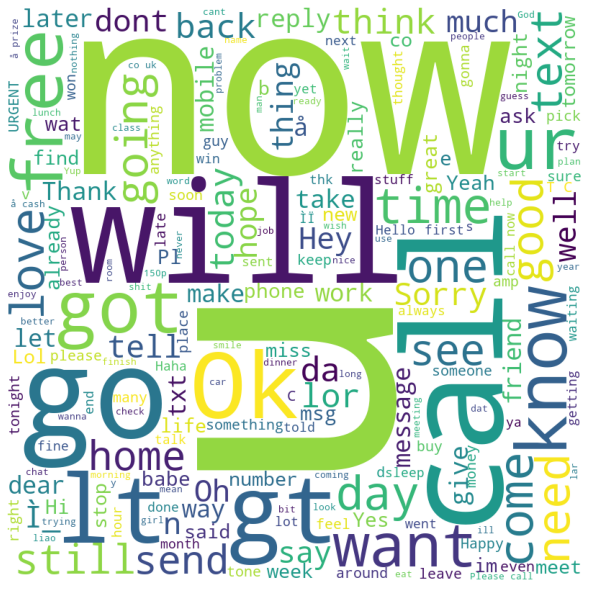

In [ ]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(data_set['Data']))

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

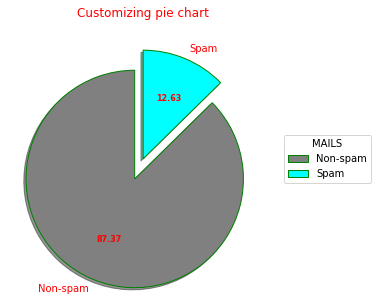

In [ ]:
#pie chart
fig, ax = plt.subplots(figsize =(5, 5))
#labels
m=['Non-spam','Spam']
#title for chart
ax.set_title("Customizing pie chart",color="red")
# Creating color parameters
colors = ( "grey", "cyan")
# Creating explode data
explode = (0.2, 0.0)
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
# Creating plot
wedges, texts, autotexts = ax.pie(data_set['Variety'].value_counts(),
                                  autopct = "%0.2f",
                                  explode = explode,
                                  labels = m,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="red"))
# Adding legend
ax.legend(wedges,m,
          title ="MAILS",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")

plt.show()

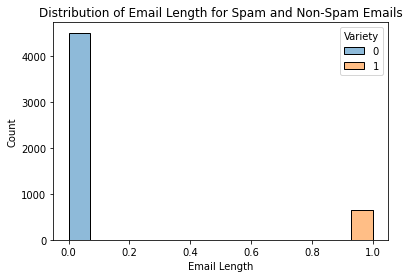

In [ ]:
#Distribution plot
sea.histplot(data=data_set, x=data_set['Variety'], hue="Variety", multiple="stack", kde=True)
plt.xlabel('Email Length')
plt.ylabel('Count')
plt.title('Distribution of Email Length for Spam and Non-Spam Emails')
plt.show()

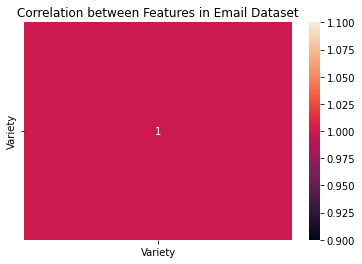

In [ ]:
#Heatmap
sea.heatmap(data_set.corr(), annot=True)
plt.title('Correlation between Features in Email Dataset')
plt.show()

In [ ]:
# Tokenize words
nltk.download('punkt')
data_set['words'] = data_set['Data'].apply(lambda x:len(nltk.word_tokenize(x)))
print(data_set.sample(8))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


      Variety                                               Data  words
1560        0  Just got some gas money, any chance you and th...     21
1946        0  Hey we can go jazz power yoga hip hop kb and y...     12
1997        0                    \YEH I AM DEF UP4 SOMETHING SAT      7
4909        0  WE REGRET TO INFORM U THAT THE NHS HAS MADE A ...     28
419         1  Send a logo 2 ur lover - 2 names joined by a h...     34
677         0  Piggy, r u awake? I bet u're still sleeping. I...     20
5267        0      Anything lar then Ì_ not going home 4 dinner?     10
2586        0  If you don't respond imma assume you're still ...     17


In [ ]:
# Tokenize sentences
data_set['sentence'] = data_set['Data'].apply(lambda x:len(nltk.sent_tokenize(x)))
print(data_set.sample(8))

      Variety                                               Data  words  \
2954        0  Id have to check but there's only like 1 bowls...     13   
1275        0                               Wot u up 2 u weirdo?      7   
2385        1  Someone has contacted our dating service and e...     30   
5271        0      So u wan 2 come for our dinner tonight a not?     12   
4161        0  How's it going? Got any exciting karaoke type ...     27   
1120        0           Cancel cheyyamo?and get some money back?      9   
5121        0                   Oops I did have it,  &lt;#&gt; ?     14   
960         0                 U sure u can't take any sick time?     10   

      sentence  
2954         1  
1275         1  
2385         3  
5271         1  
4161         4  
1120         1  
5121         1  
960          1  


In [ ]:
# Count number of characters in each text
data_set['chars']= data_set['Data'].apply(len)
print(data_set.sample(8))

      Variety                                               Data  words  \
5033        0                        I want to go to perumbavoor      6   
1842        0                      \Are you comingdown later?\""      8   
2216        0  OK i'm waliking ard now... Do u wan me 2 buy a...     18   
382         0         Hey leave it. not a big deal:-) take care.     14   
267         1  Ur ringtone service has changed! 25 Free credi...     32   
3877        0       What you need. You have a person to give na.     12   
1741        0  I can do that! I want to please you both insid...     17   
143         0         I know you are. Can you pls open the back?     12   

      sentence  chars  
5033         1     27  
1842         1     29  
2216         1     66  
382          2     42  
267          6    159  
3877         2     44  
1741         2     74  
143          2     42  


In [ ]:
# Statistics summary of Spam mails
print("Statistics summary of Spam mails")
print(data_set[data_set['Variety'] == 1][['words', 'sentence', 'chars']].describe())

Statistics summary of Spam mails
            words    sentence       chars
count  653.000000  653.000000  653.000000
mean    27.667688    2.967841  137.891271
std      7.008418    1.483201   30.137753
min      2.000000    1.000000   13.000000
25%     25.000000    2.000000  132.000000
50%     29.000000    3.000000  149.000000
75%     32.000000    4.000000  157.000000
max     46.000000    8.000000  224.000000


In [ ]:
# Statistics summary of Non-Spam mails
print("Statistics summary of Non-Spam mails")
print(data_set[data_set['Variety'] == 0][['words', 'sentence', 'chars']].describe())

Statistics summary of Non-Spam mails
             words     sentence        chars
count  4516.000000  4516.000000  4516.000000
mean     17.120903     1.799601    70.459256
std      13.493725     1.278465    56.358207
min       1.000000     1.000000     2.000000
25%       8.000000     1.000000    34.000000
50%      13.000000     1.000000    52.000000
75%      22.000000     2.000000    90.000000
max     220.000000    28.000000   910.000000


In [ ]:
#Removing stop words
nltk.download('stopwords')
stop = stopwords.words('english')

data_set['Data'] = data_set['Data'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_set['Data'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Variety,Data,words,sentence,chars
0,0,go jurong point crazi avail bugi n great world...,24,2,111
1,0,ok lar joke wif u oni,8,2,29
2,1,free entri 2 wkli comp win fa cup final tkt 21...,37,2,155
3,0,u dun say earli hor u c alreadi say,13,1,49
4,0,nah i think goe usf live around though,15,1,61


In [ ]:
#Removing punctuations and lower casing
data_set['Data'] = data_set['Data'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
data_set['Data'] = data_set['Data'].apply(lambda x: x.lower())

#stemming of words
st = PorterStemmer()
data_set['Data'] = data_set['Data'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))
data_set.head()

,Variety,Data,words,sentence,chars
0,0,go jurong point crazi avail bugi n great world...,24,2,111
1,0,ok lar joke wif u oni,8,2,29
2,1,free entri 2 wkli comp win fa cup final tkt 21...,37,2,155
3,0,u dun say earli hor u c alreadi say,13,1,49
4,0,nah i think goe usf live around though,15,1,61


In [ ]:
#Vectorizing the Words
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(data_set['Data'])
X = features
y = data_set['Variety']

In [ ]:
#Splitting the Dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Model Training
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#prediction
prediction_on_training_data = knn.predict(X_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data*100)

Accuracy on training data :  91.58403869407496


In [ ]:
#Model Training
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#Prediction and Model Evaluation
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy*100)
print('Confusion matrix:\n', conf_matrix)
print('Classification report:\n', class_report)

Accuracy: 96.0348162475822
Confusion matrix:
 [[889   0]
 [ 41 104]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.72      0.84       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034

